In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None  # default='warn'
#Modification des affichages de colonnes, lignes et largeurs de colonnes pour avoir un maximum d'information
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', None)

Selon l'OMS le pourcentage d'adultes obèses en France d'ici 2030 sera de 25% pour les hommes et 29% pour les femmes. Des chiffres en progression constante et qui constituent un problème majeur de santé publique. 

Les principales causes de l'obésité ? 

-La consommation excessive d'aliments caloriques (Fast Food, aliments transformés etc) ; 

-La prédisposition génétique ; 

-Une pratique sportive insuffisante ou inexistante. 

 
### Notre idée d'application

Sama Assiette scanne les produits alimentaires pour décrypter leur composition et évaluer leur impact sur la consommation de calories. 
 
Face à des étiquettes indéchiffrables, Sama Assiette apporte plus de transparence en un simple scan et permet de consommer de façon plus éclairée. 
 
Notre application indique via un code couleur très simple l'impact du produit sur votre santé : excellent, bon, médiocre ou mauvais. 
 
Chaque produit est évalué selon 2 critères objectifs : en nutriments et aliments à favoriser (fibres, protéines, fruits, légumes …) et en nutriments à limiter (énergie, acides gras saturés, sucres, sel). 
 
La méthode de notation repose sur l'analyse de l'ensemble des ingrédients du produit. Chaque ingrédient se voit attribuer un niveau de risque, basé sur l'état de la science à ce jour. 
 
Pour tous les produits ayant une évaluation négative, Sama Assiette recommande des alternatives de produits similaires meilleurs pour la santé. 
  

 

In [22]:
dataset = pd.read_csv('fr.openfoodfacts.org.products.csv', sep='\t', low_memory=False)


In [23]:
#dataset.head()

In [24]:
#dataset.tail()

In [25]:
def exploratory(data):
    print(f"Ce dataset contient {data.shape[0]} lignes etudiées sur {data.shape[1]} colonnes")
    #Recherche de doublons sur les lignes du dataset
    doublonL=data[data.duplicated(keep=False)]
    print(f"Il y a {doublonL.shape[0]} doublons dans les lignes")
    #Recherche de doublons sur les colonnes du dataset
    doublonC=data[data.duplicated(keep=False)].T
    print(f"Il y a {doublonC.shape[1]} doublons dans les colonnes")
    #Vérifie s'il y a des nan et les additionne pour chaque colonne
    perNan=data.isna().sum().sort_values(ascending=False)*100/len(data)
    print(f"Affichage du pourcentage de nan dans chaque colonnes: {perNan} %")
    #Observation du taux de remplissage de notre dataset
    sns.set(style="whitegrid")
    plt.figure(figsize=(16, 8))
    plt.title("Taux de remplissage du dataset")
    sns.heatmap(data.isnull(), cbar=False)
    plt.show()
    #compte les valeurs uniques de la série
    valeursUniques=data.nunique()
    print(f"Le nombre d'occurence des valeurs uniques:{valeursUniques}")
    ColumnData=data.columns
    print(f"La liste des colonnes est : {ColumnData}")
    

Ce dataset contient 320772 lignes etudiées sur 162 colonnes
Il y a 0 doublons dans les lignes
Il y a 0 doublons dans les colonnes
Affichage du pourcentage de nan dans chaque colonnes: water-hardness_100g                           100.000000
no_nutriments                                 100.000000
ingredients_that_may_be_from_palm_oil         100.000000
nutrition_grade_uk                            100.000000
nervonic-acid_100g                            100.000000
erucic-acid_100g                              100.000000
mead-acid_100g                                100.000000
elaidic-acid_100g                             100.000000
butyric-acid_100g                             100.000000
caproic-acid_100g                             100.000000
ingredients_from_palm_oil                     100.000000
lignoceric-acid_100g                          100.000000
cerotic-acid_100g                             100.000000
melissic-acid_100g                            100.000000
chlorophyl_100g   

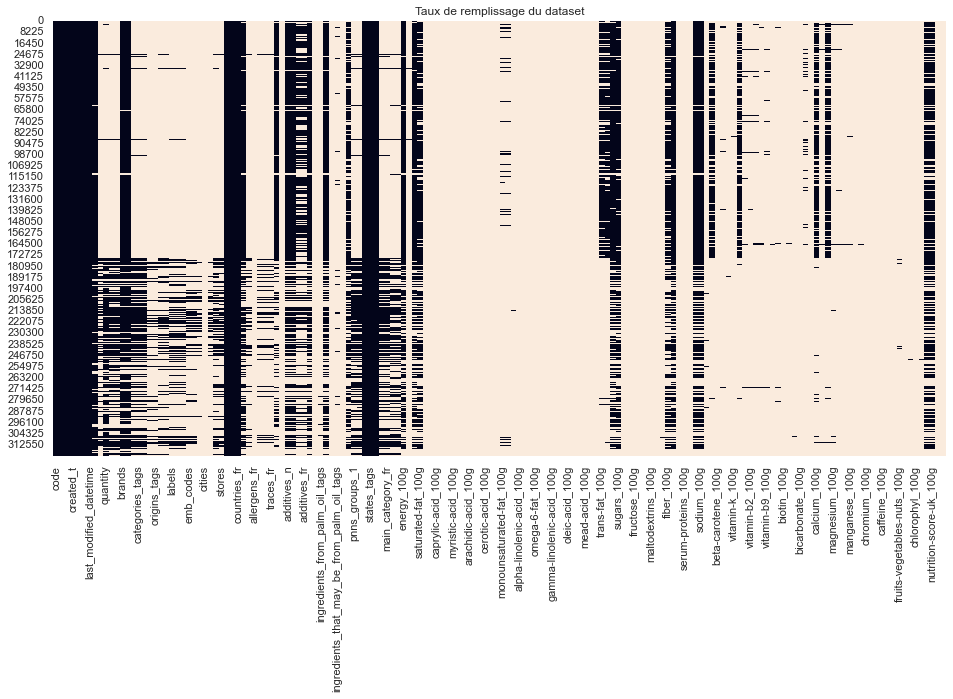

Le nombre d'occurence des valeurs uniques:code                                          320749
url                                           320749
creator                                         3535
created_t                                     189567
created_datetime                              189568
last_modified_t                               180495
last_modified_datetime                        180495
product_name                                  221347
generic_name                                   38584
quantity                                       13826
packaging                                      14547
packaging_tags                                 12064
brands                                         58784
brands_tags                                    50253
categories                                     36982
categories_tags                                21142
categories_fr                                  21152
origins                                         4840
orig

In [26]:
exploratory(dataset)

In [27]:
listColumns = dataset.columns.tolist()

On remarque qu'il y a beaucoup de colonnes vides

# Suppression de colonnes avec un taux de remplissage inférieur à 25%

In [28]:
null_columns = [col for col in dataset.columns if dataset.isna().sum()[col]>=(320772*0.75)]

In [29]:
colToDel=dataset[null_columns].columns.tolist()

In [30]:
colToDel

['generic_name',
 'packaging',
 'packaging_tags',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_fr',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'allergens',
 'allergens_fr',
 'traces',
 'traces_tags',
 'traces_fr',
 'no_nutriments',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutrition_grade_uk',
 'image_url',
 'image_small_url',
 'energy-from-fat_100g',
 'butyric-acid_100g',
 'caproic-acid_100g',
 'caprylic-acid_100g',
 'capric-acid_100g',
 'lauric-acid_100g',
 'myristic-acid_100g',
 'palmitic-acid_100g',
 'stearic-acid_100g',
 'arachidic-acid_100g',
 'behenic-acid_100g',
 'lignoceric-acid_100g',
 'cerotic-acid_100g',
 'montanic-acid_100g',
 'melissic-acid_100g',
 'monounsaturated-fat_100g',
 'polyunsaturated-fat_100g',
 'ome

In [31]:
dataset.drop(colToDel,inplace=True, axis=1)

In [32]:
dataset.shape

(320772, 50)

Il ne nous reste plus que 50 colonnes sur les 162 initiales.


# Essayons de les regrouper par pays

In [33]:
data=dataset.groupby(by='countries_tags').count()
#display(data)

On remarque que la plupart des données viennent des Etats Unis et de la France.
On ne gardera que les produits venant de ces deux pays.

In [34]:
data1=dataset[dataset.countries_tags=='en:france']
data2=dataset[dataset.countries_tags=='en:united-states']
frames = [data1, data2]
dataset = pd.concat(frames)
#display(dataset)

In [35]:
dataset=dataset.drop(['countries','countries_fr'], axis=1)

Les colonnes countries, countries_tags et countries_fr fournissent les mêmes informations. Nous ne garderons que la colonne counntries_tags dans la suite de notre analyse

# Suppression des données redondantes ou inutiles

In [36]:
dataset= dataset.drop(['created_datetime','last_modified_datetime','brands','additives_tags','states','states_fr','main_category'], axis=1)

In [37]:
display(dataset)

,code,url,creator,created_t,last_modified_t,product_name,quantity,brands_tags,categories,categories_tags,categories_fr,countries_tags,ingredients_text,serving_size,additives_n,additives,additives_fr,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states_tags,main_category_fr,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000000003087/farine-de-ble-noir-ferme-t-y-r-nao,openfoodfacts-contributors,1474103866,1474103893,Farine de blé noir,1kg,ferme-t-y-r-nao,NaN,NaN,NaN,en:france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed,en:nutrition-facts-to-be-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:characteristics-to-be-completed,en:categories-to-be-completed,en:brands-completed,en:packaging-to-be-completed,en:quantity-completed,en:product-name-completed,en:photos-to-be-validated,en:photos-uploaded",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,0000000024600,http://world-fr.openfoodfacts.org/produit/0000000024600/filet-de-boeuf,date-limite-app,1434530704,1434535914,Filet de bœuf,2.46 kg,NaN,Filet de bœuf,fr:filet-de-boeuf,Filet-de-boeuf,en:france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed,en:nutrition-facts-to-be-completed,en:ingredients-to-be-completed,en:expiration-date-completed,en:characteristics-to-be-completed,en:categories-completed,en:brands-to-be-completed,en:packaging-completed,en:quantity-completed,en:product-name-completed,en:photos-to-be-validated,en:photos-uploaded",Filet-de-boeuf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,0000000027205,http://world-fr.openfoodfacts.org/produit/0000000027205,tacinte,1458238630,1458238638,NaN,NaN,NaN,NaN,NaN,NaN,en:france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed,en:nutrition-facts-to-be-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:characteristics-to-be-completed,en:categories-to-be-completed,en:brands-to-be-completed,en:packaging-to-be-completed,en:quantity-to-be-completed,en:product-name-to-be-completed,en:photos-to-be-validated,en:photos-uploaded",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,0000000039259,http://world-fr.openfoodfacts.org/produit/0000000039259/twix-x2,tacinte,1422221773,1473538082,Twix x2,NaN,NaN,NaN,NaN,NaN,en:france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed,en:nutrition-facts-to-be-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:characteristics-to-be-completed,en:categories-to-be-completed,en:brands-to-be-completed,en:packaging-to-be-completed,en:quantity-to-be-completed,en:product-name-completed,en:photos-to-be-uploaded",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,0000005200016,http://world-fr.openfoodfacts.org/produit/0000005200016/lentilles-vertes-bertrand-lejeune,sigoise,1441186657,1442570752,lentilles vertes,1 kg,bertrand-lejeune,"Aliments et boissons à base de végétaux,Aliments d'origine végétale,Légumineuses et dérivés,Céréales et pommes de terre,Légumineuses,Graines,Graines de légumineuses,Légumes secs,Lentilles vertes","en:plant-based-foods-and-beverages,en:plant-based-foods,en:cereals-and-potatoes,en:legumes-and-their-products,en:legumes,en:seeds,en:legume-seeds,en:pulses,en:lentils,en:green-lentils","Aliments et boissons à base de végétaux,Aliments d'origine végétale,Céréales et pommes de terre,Légumineuses et dérivés,Légumineuses,Graines,Graines de légumineuses,Légumes secs,Lentilles,Lentilles vertes",en:france,lentilles vertes,NaN,0.0,[ lentilles-vertes -> fr:lentilles-vertes ] [ lentilles -> fr:lentilles ],NaN,0.0,0.0,NaN,Cereals and 

In [38]:
dataset.shape

(267389, 41)

Il ne nous reste plus que 41 colonnes à considérer

Comment est attribué le nutriscore ?
Le logo est attribué sur la base d’un score prenant en compte pour 100 gr ou 100 mL de produit, la teneur :

en nutriments et aliments à favoriser (fibres, protéines, fruits, légumes, légumineuses, fruits à coques, huile de colza, de noix et d’olive),
et en nutriments à limiter (énergie, acides gras saturés, sucres, sel).
Après calcul, le score obtenu par un produit permet de lui attribuer une lettre et une couleur.

Utilisons ces infos pour supprimer les données inutiles 

In [39]:
dataset.columns

Index(['code', 'url', 'creator', 'created_t', 'last_modified_t',
       'product_name', 'quantity', 'brands_tags', 'categories',
       'categories_tags', 'categories_fr', 'countries_tags',
       'ingredients_text', 'serving_size', 'additives_n', 'additives',
       'additives_fr', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'pnns_groups_1', 'pnns_groups_2', 'states_tags', 'main_category_fr',
       'energy_100g', 'fat_100g', 'saturated-fat_100g', 'trans-fat_100g',
       'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin-a_100g',
       'vitamin-c_100g', 'calcium_100g', 'iron_100g',
       'nutrition-score-fr_100g', 'nutrition-score-uk_100g'],
      dtype='object')

In [40]:
dataset= dataset.drop(['url','creator', 'created_t', 'last_modified_t','quantity', 'serving_size','additives_n',
       'additives', 'additives_fr', 'ingredients_from_palm_oil_n','categories','categories_fr','countries_tags','brands_tags',
       'ingredients_that_may_be_from_palm_oil_n', 'states_tags', 'main_category_fr','categories_tags','vitamin-a_100g',
       'vitamin-c_100g', 'calcium_100g', 'iron_100g','carbohydrates_100g', 'sodium_100g'], axis=1)

In [41]:
dataset

,code,product_name,ingredients_text,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000003087,Farine de blé noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,0000000024600,Filet de bœuf,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,0000000027205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,0000000039259,Twix x2,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,0000005200016,lentilles vertes,lentilles vertes,NaN,Cereals and potatoes,Legumes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320742,9787461062105,Natural Cassava,Cassava.,a,NaN,NaN,1477.0,0.0,0.0,0.0,0.0,2.35,4.7,1.18,0.03048,-1.0,-1.0
320744,9800120499,Ferrero Rocher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320750,9836654056565,Raspados Ice Bars,"Water, high fructose corn syrup, contains 2% or less of the following: maltodextrin, citric acid, pectin, natural and artificial flavors, sodium citrate, caramel color, sodium benzoate and potassium sorbate (preservatives), yellow 5, red 40, yellow 6.",NaN,NaN,NaN,368.0,0.0,NaN,NaN,NaN,19.30,NaN,0.00,0.04572,NaN,NaN
320768,99567453,"Mint Melange Tea A Blend Of Peppermint, Lemon Grass And Spearmint","Organic peppermint, organic lemon grass, organic spearmint.",b,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00000,0.0,0.0


Nous faisons le choix de ne travaller qu'avec le nutrition-score-fr_100g, nous supprimons le nutrition-score-uk_100g

In [42]:
dataset = dataset.drop('nutrition-score-uk_100g',axis=1)

In [43]:
variables=dataset.columns.tolist()
variables

['code',
 'product_name',
 'ingredients_text',
 'nutrition_grade_fr',
 'pnns_groups_1',
 'pnns_groups_2',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'nutrition-score-fr_100g']

In [44]:
dataset.shape

(267389, 16)

### Intéressons nous maintenant aux différentes catégories

In [45]:
dataset['pnns_groups_1'].unique()

array([nan, 'unknown', 'Cereals and potatoes', 'Sugary snacks',
       'Beverages', 'Fish Meat Eggs', 'Fruits and vegetables',
       'Composite foods', 'Salty snacks', 'Fat and sauces',
       'Milk and dairy products', 'fruits-and-vegetables',
       'sugary-snacks', 'cereals-and-potatoes'], dtype=object)

In [46]:
dataset['pnns_groups_1'].nunique()

13

Il y a 13 catégories dans pnns_groups_1

In [47]:
dataset['pnns_groups_2'].unique()

array([nan, 'unknown', 'Legumes', 'Biscuits and cakes', 'Sweets',
       'Non-sugared beverages', 'Sweetened beverages', 'Meat', 'Soups',
       'Alcoholic beverages', 'Sandwich', 'Appetizers',
       'Dressings and sauces', 'Chocolate products', 'Dried fruits',
       'Nuts', 'One-dish meals', 'Cheese', 'Fruits', 'Fats',
       'Pizza pies and quiche', 'Vegetables', 'Breakfast cereals',
       'Cereals', 'Fruit juices', 'vegetables', 'Ice cream',
       'Milk and yogurt', 'Bread', 'Fish and seafood', 'Tripe dishes',
       'pastries', 'Processed meat', 'Dairy desserts',
       'Artificially sweetened beverages', 'Fruit nectars', 'Potatoes',
       'Eggs', 'Salty and fatty products', 'fruits', 'legumes', 'cereals'],
      dtype=object)

In [48]:
dataset['pnns_groups_2'].nunique()

41

Il y a 41 catégories dans pnns_groups_2

In [49]:
dataset.isna().sum()

code                            0
product_name                 7486
ingredients_text            45335
nutrition_grade_fr          69791
pnns_groups_1              203536
pnns_groups_2              201466
energy_100g                 34730
fat_100g                    51553
saturated-fat_100g          62559
trans-fat_100g             124687
cholesterol_100g           124033
sugars_100g                 47766
fiber_100g                  83874
proteins_100g               35464
salt_100g                   37029
nutrition-score-fr_100g     69791
dtype: int64

In [50]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267389 entries, 0 to 320771
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   code                     267389 non-null  object 
 1   product_name             259903 non-null  object 
 2   ingredients_text         222054 non-null  object 
 3   nutrition_grade_fr       197598 non-null  object 
 4   pnns_groups_1            63853 non-null   object 
 5   pnns_groups_2            65923 non-null   object 
 6   energy_100g              232659 non-null  float64
 7   fat_100g                 215836 non-null  float64
 8   saturated-fat_100g       204830 non-null  float64
 9   trans-fat_100g           142702 non-null  float64
 10  cholesterol_100g         143356 non-null  float64
 11  sugars_100g              219623 non-null  float64
 12  fiber_100g               183515 non-null  float64
 13  proteins_100g            231925 non-null  float64
 14  salt

In [51]:
dataset.shape

(267389, 16)

In [52]:
dataset.describe()

,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
count,2.326590e+05,215836.000000,204830.000000,142702.000000,143356.000000,219623.000000,183515.000000,231925.000000,230360.000000,197598.000000
mean,1.142814e+03,12.588791,5.051005,0.073076,0.020125,16.114021,2.846670,7.070508,2.117359,9.192537
std,6.821498e+03,17.538614,7.937587,1.540976,0.358970,22.576395,13.388568,8.487080,135.063580,9.023773
min,0.000000e+00,0.000000,0.000000,-3.570000,0.000000,-17.860000,-6.700000,-800.000000,0.000000,-15.000000
25%,3.770000e+02,0.000000,0.000000,0.000000,0.000000,1.300000,0.000000,0.500000,0.063500,1.000000
50%,1.109000e+03,4.905000,1.790000,0.000000,0.000000,5.880000,1.500000,4.690000,0.604520,10.000000
75%,1.674000e+03,20.000000,7.140000,0.000000,0.020000,24.200000,3.600000,10.000000,1.400000,16.000000
max,3.251373e+06,714.290000,550.000000,369.000000,95.238000,3520.000000,5380.000000,430.000000,64312.800000,40.000000


In [53]:
varNum = ['energy_100g','fat_100g','saturated-fat_100g','trans-fat_100g','cholesterol_100g','sugars_100g','fiber_100g','proteins_100g','salt_100g']

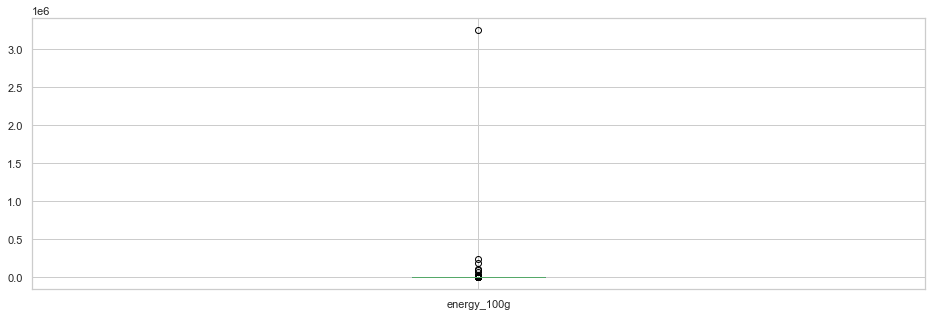

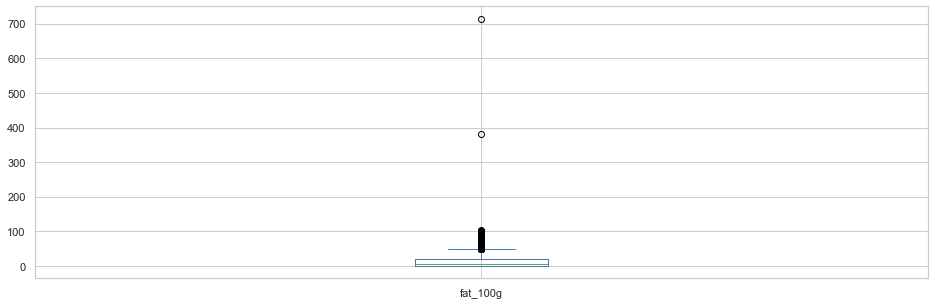

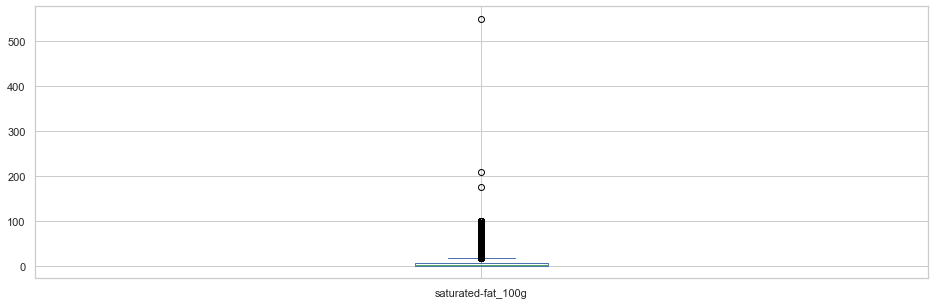

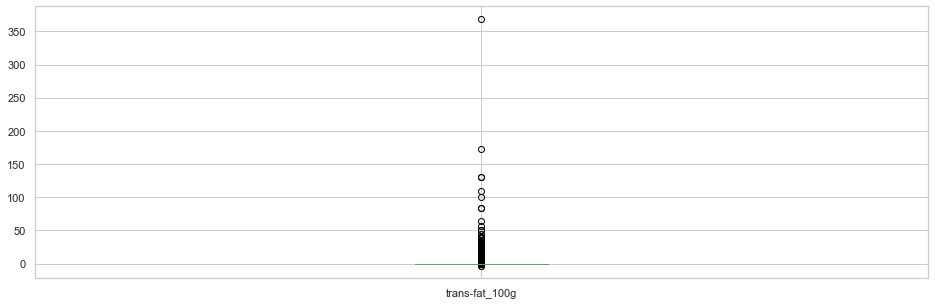

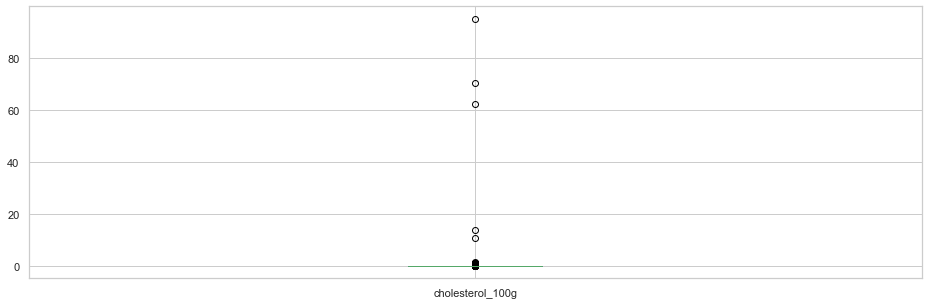

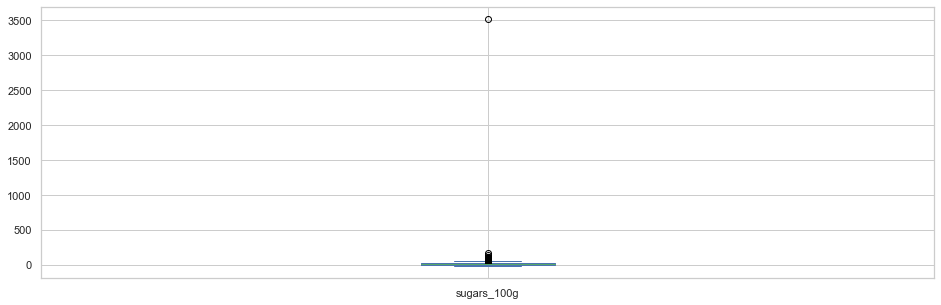

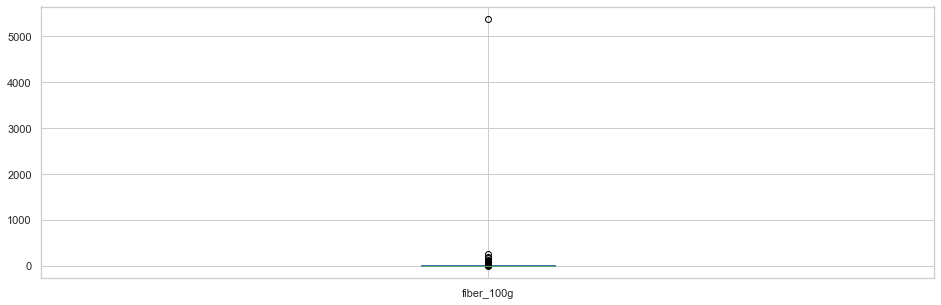

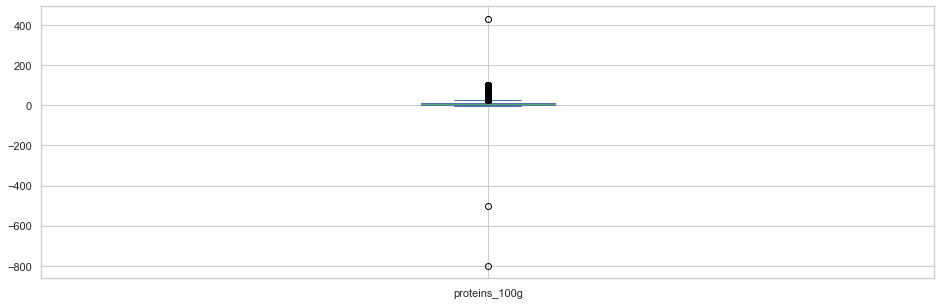

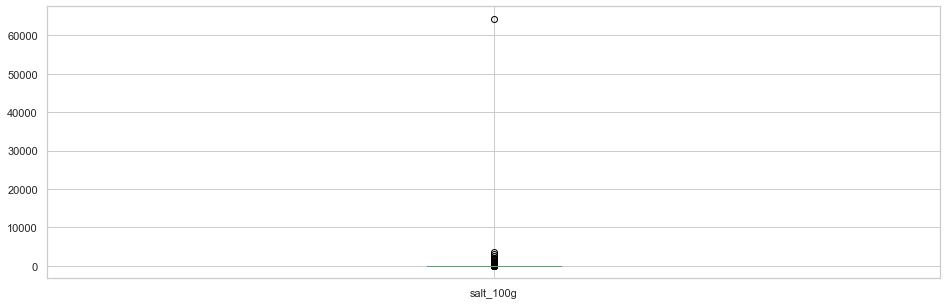

In [54]:
for i in varNum:
    plt.figure(1)
    dataset[i].plot.box(figsize=(16,5))
    plt.show()

On constate la présence de valeurs aberrantes, ce qui pourrait impacter également l'écart-type.

In [55]:
dataset

,code,product_name,ingredients_text,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
0,0000000003087,Farine de blé noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,0000000024600,Filet de bœuf,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,0000000027205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,0000000039259,Twix x2,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,0000005200016,lentilles vertes,lentilles vertes,NaN,Cereals and potatoes,Legumes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320742,9787461062105,Natural Cassava,Cassava.,a,NaN,NaN,1477.0,0.0,0.0,0.0,0.0,2.35,4.7,1.18,0.03048,-1.0
320744,9800120499,Ferrero Rocher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320750,9836654056565,Raspados Ice Bars,"Water, high fructose corn syrup, contains 2% or less of the following: maltodextrin, citric acid, pectin, natural and artificial flavors, sodium citrate, caramel color, sodium benzoate and potassium sorbate (preservatives), yellow 5, red 40, yellow 6.",NaN,NaN,NaN,368.0,0.0,NaN,NaN,NaN,19.30,NaN,0.00,0.04572,NaN
320768,99567453,"Mint Melange Tea A Blend Of Peppermint, Lemon Grass And Spearmint","Organic peppermint, organic lemon grass, organic spearmint.",b,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00000,0.0


# Traitement des valeurs manquantes


In [56]:
datacopy = dataset.copy()

In [57]:
from sklearn.impute import KNNImputer

# On entraine le modèle d'imputation sur un échantillon de données
varNum = ['energy_100g','fat_100g','saturated-fat_100g','trans-fat_100g','cholesterol_100g','sugars_100g','fiber_100g','proteins_100g','salt_100g']
sampleData = datacopy[varNum].sample(frac=0.25, random_state=1)
imputer = KNNImputer(n_neighbors=5, missing_values=np.nan)
imputer.fit(sampleData)

KNNImputer()

In [59]:
# Puis on applique le modèle sur l'ensemble des données
dataImputed = imputer.transform(datacopy[varNum])
dataKnn = pd.DataFrame(dataImputed, columns=varNum)

In [60]:
for var in varNum:
    datacopy[var] = dataKnn[var].values

### Supprimons toutes les lignes dont les nutriscores ne sont pas renseignés

In [61]:
datacopy = datacopy[datacopy['nutrition-score-fr_100g'].notna()]

In [62]:
datacopy

,code,product_name,ingredients_text,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
190,0000010187319,Mini Confettis,NaN,d,NaN,NaN,1753.0,0.000,0.80,0.0,0.0152,87.70,0.9,0.60,0.01000,14.0
191,0000010207260,Praliné Amande Et Noisette,NaN,d,NaN,NaN,2406.0,0.000,2.90,0.0,0.0158,50.30,3.9,9.50,0.00300,14.0
226,0000040608754,"Pepsi, Nouveau goût !","Eau gazéifiée, sucre, colorant caramel E150d, acidifiant : acide phosphorique, arômes (dont : extraits naturels de végétaux, caféine)",e,Beverages,Sweetened beverages,177.0,0.000,0.00,0.0,0.0000,10.40,0.0,0.00,0.02540,13.0
234,0000069161025,Tarte Poireaux Et Lardons,NaN,d,NaN,NaN,1079.0,8.204,11.00,0.0,0.0776,1.00,1.4,7.50,0.80000,15.0
240,0000087177756,7Up,"Eau gazéifiée, sucre, acidifiants (acide citrique, acide malique), arômes (extraits naturels de citron et de citron vert), correcteur d'acidité (citrate de sodium)",e,Beverages,Sweetened beverages,177.0,0.000,0.00,0.0,0.0000,10.40,0.0,0.00,0.10000,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320664,95656335,Chipotle Peppers In Adobo Sauce,"Chipotle peppers, water, vinegar, tomatoes, onions, iodized salt, sugar, paprika, soybean oil and spices.",c,NaN,NaN,280.0,0.000,0.00,0.0,0.0000,6.67,10.0,0.00,3.21818,6.0
320665,95659305,Dal Makhani,"Tomato, black gram, water, milk cream, cottonseed oil, onion, salt, red kidney beans, cashew nuts, ginger fresh, garlic fresh, chillies, coriander leaf, spices (black pepper, cinnamon, clove, coriander, cardamom, chillies, cumin, poppy seeds, nutmeg, bay leaf), turmeric powder, cardamom, cinnamon, clove.",b,NaN,NaN,502.0,5.330,1.00,0.0,0.0070,0.00,2.0,4.67,1.37160,2.0
320738,9780803738782,Organic Z Bar,"Organic oat blend (organic rolled oats, organic oat flour, organic oat fiber), organic tapioca syrup, organic cane syrup, organic chocolate chips (organic dried cane syrup, organic unsweetened chocolate, organic cocoa butter, organic soy lecithin, organic",d,NaN,NaN,1393.0,9.720,2.78,0.0,0.0000,30.56,8.3,5.56,0.95250,11.0
320742,9787461062105,Natural Cassava,Cassava.,a,NaN,NaN,1477.0,0.000,0.00,0.0,0.0000,2.35,4.7,1.18,0.03048,-1.0


In [63]:
datacopy.isna().sum()

code                            0
product_name                  389
ingredients_text            20222
nutrition_grade_fr              0
pnns_groups_1              151597
pnns_groups_2              151506
energy_100g                     0
fat_100g                        0
saturated-fat_100g              0
trans-fat_100g                  0
cholesterol_100g                0
sugars_100g                     0
fiber_100g                      0
proteins_100g                   0
salt_100g                       0
nutrition-score-fr_100g         0
dtype: int64

# Traitement des Outliers

In [64]:
varNum

['energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g']

In [65]:
def rmOutliers(dataset, varNum):
    Q1 = dataset[varNum].quantile(0.25)
    Q3 = dataset[varNum].quantile(0.75)
    IQR = Q3 - Q1
    dataset = dataset[~((dataset[varNum] < (Q1 - 1.5 * IQR)) |(dataset[varNum] > (Q3 + 1.5 * IQR))).any(axis=1)]
    return dataset


In [66]:
data = rmOutliers(datacopy, varNum)

In [67]:
data.describe()

,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
count,121869.000000,121869.000000,121869.000000,121869.0,121869.000000,121869.000000,121869.000000,121869.000000,121869.000000,121869.000000
mean,939.529671,8.014422,2.627858,0.0,0.008589,12.216692,2.043446,5.674118,0.746094,6.358171
std,702.767759,10.579915,3.932843,0.0,0.013796,14.408421,2.142312,5.271228,0.747919,8.305244
min,0.000000,0.000000,0.000000,0.0,0.000000,-6.250000,0.000000,-3.570000,0.000000,-14.000000
25%,297.000000,0.000000,0.000000,0.0,0.000000,1.790000,0.000000,1.300000,0.100000,0.000000
50%,795.000000,3.100000,0.620000,0.0,0.000000,5.500000,1.500000,4.230000,0.589280,4.000000
75%,1540.000000,12.000000,3.610000,0.0,0.012400,18.460000,3.300000,8.330000,1.168400,13.000000
max,3573.000000,49.150000,17.700000,0.0,0.057400,55.830000,9.000000,24.420000,3.332480,36.000000


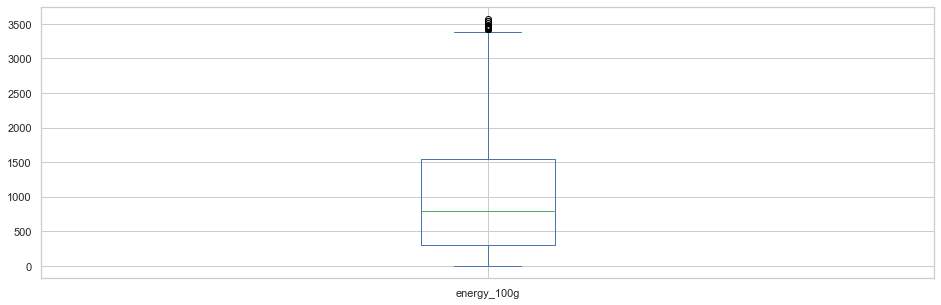

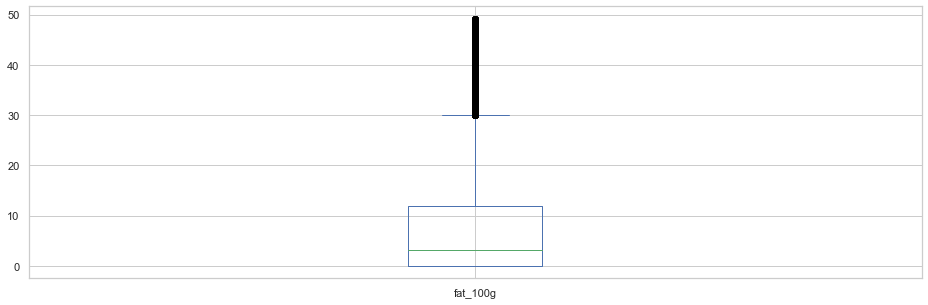

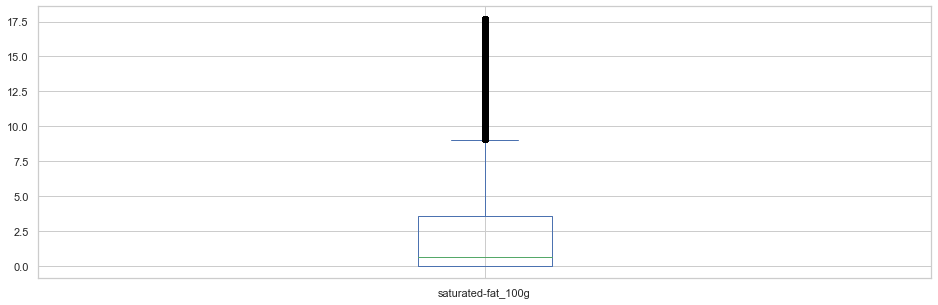

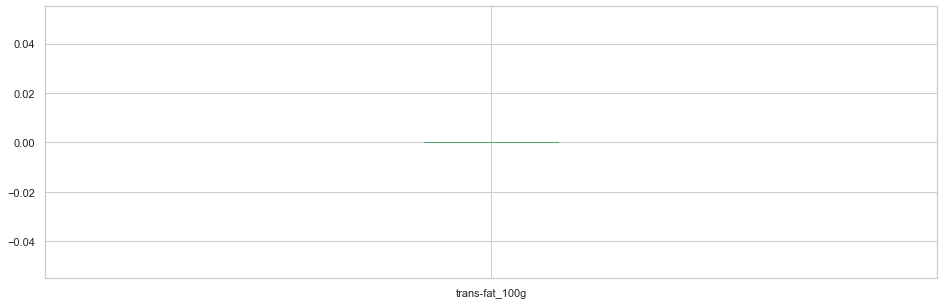

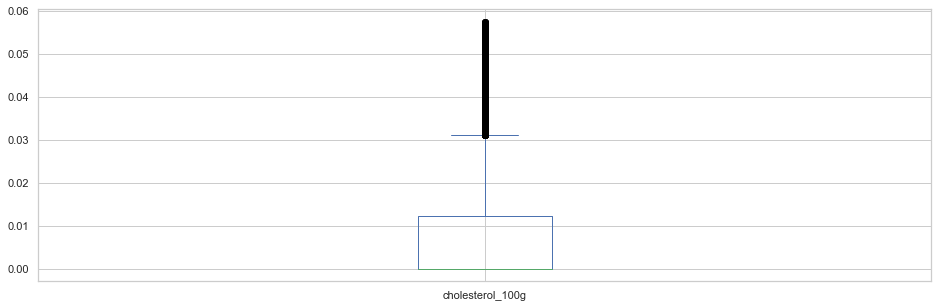

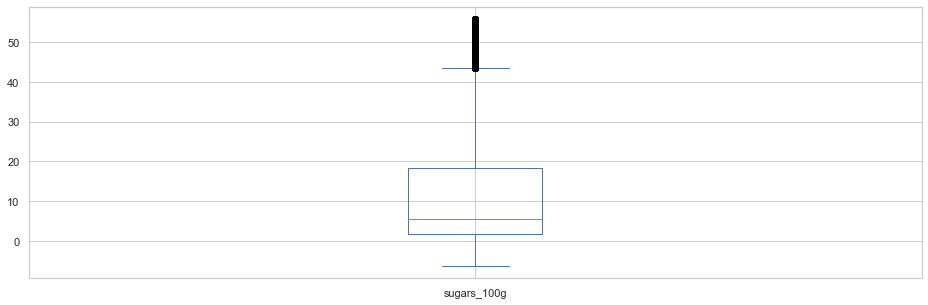

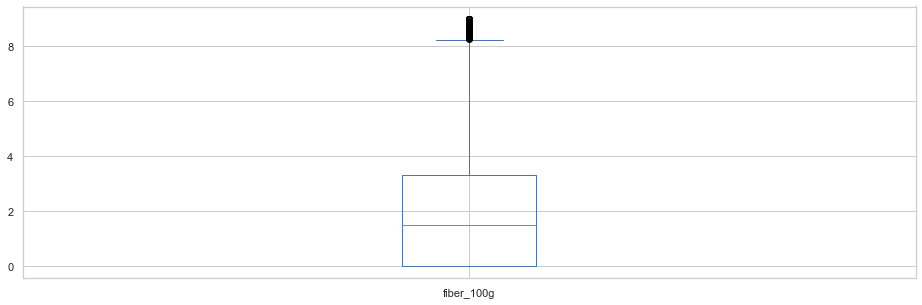

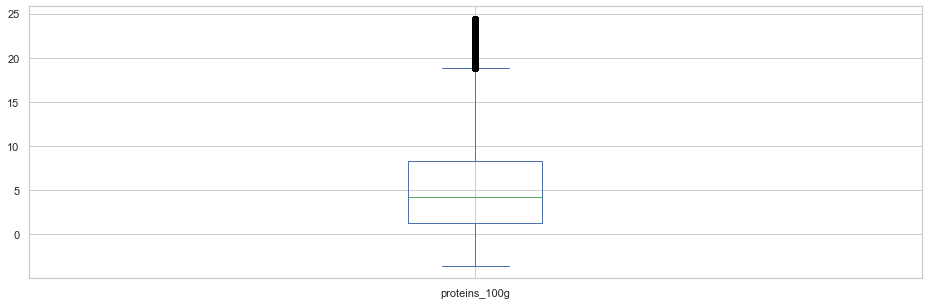

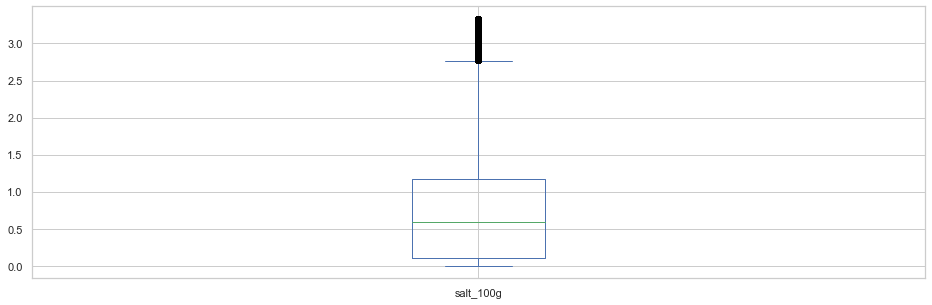

In [68]:
for i in varNum:
    plt.figure(1)
    data[i].plot.box(figsize=(16,5))
    plt.show()

In [90]:
data = data.dropna(axis=0)

Nous avons supprimés les valeurs aberrantes, même s'il reste des valeurs atypiques, que nous allons laisser

In [91]:
#Enregistrement de notre dataset cleané dans le fichier csv cleanData pour l'utiliser dans nootre analyse à venir
data.to_csv('cleanData.csv', index=None)

### Autres Méthodes de traitement des valeurs Manquantes

#### IterativeImputer

In [71]:
datacopy1 = dataset.copy()
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

sampleData1 = datacopy1[varNum].sample(frac=0.25, random_state=1)
# Setting the random_state argument for reproducibility
imputer = IterativeImputer(random_state=42)
imputed = imputer.fit(sampleData1)


In [72]:
dataImputed1 = imputer.transform(datacopy1[varNum])
dataII = pd.DataFrame(dataImputed1, columns=varNum)

In [74]:
for var in varNum:
    datacopy1[var] = dataII[var].values

In [77]:
datacopy1.isna().sum()

code                            0
product_name                 7486
ingredients_text            45335
nutrition_grade_fr          69791
pnns_groups_1              203536
pnns_groups_2              201466
energy_100g                     0
fat_100g                        0
saturated-fat_100g              0
trans-fat_100g                  0
cholesterol_100g                0
sugars_100g                     0
fiber_100g                      0
proteins_100g                   0
salt_100g                       0
nutrition-score-fr_100g     69791
dtype: int64

In [78]:
datacopy1 = datacopy1[datacopy1['nutrition-score-fr_100g'].notna()]

In [79]:
datacopy1.isna().sum()

code                            0
product_name                  389
ingredients_text            20222
nutrition_grade_fr              0
pnns_groups_1              151597
pnns_groups_2              151506
energy_100g                     0
fat_100g                        0
saturated-fat_100g              0
trans-fat_100g                  0
cholesterol_100g                0
sugars_100g                     0
fiber_100g                      0
proteins_100g                   0
salt_100g                       0
nutrition-score-fr_100g         0
dtype: int64

#### Simple Imputer

In [80]:
datacopy2 = dataset.copy()

from sklearn.impute import SimpleImputer

sampleData2 = datacopy2[varNum].sample(frac=0.25, random_state=1)

imputer = SimpleImputer(strategy='mean')
imputed = imputer.fit(sampleData2)


In [83]:
dataImputed2 = imputer.transform(datacopy2[varNum])
dataSI = pd.DataFrame(dataImputed2, columns=varNum)


In [84]:
for var in varNum:
    datacopy2[var] = dataSI[var].values

In [85]:
datacopy2.isna().sum()

code                            0
product_name                 7486
ingredients_text            45335
nutrition_grade_fr          69791
pnns_groups_1              203536
pnns_groups_2              201466
energy_100g                     0
fat_100g                        0
saturated-fat_100g              0
trans-fat_100g                  0
cholesterol_100g                0
sugars_100g                     0
fiber_100g                      0
proteins_100g                   0
salt_100g                       0
nutrition-score-fr_100g     69791
dtype: int64

In [86]:
datacopy2 = datacopy2[datacopy2['nutrition-score-fr_100g'].notna()]

In [87]:
datacopy2.isna().sum()

code                            0
product_name                  389
ingredients_text            20222
nutrition_grade_fr              0
pnns_groups_1              151597
pnns_groups_2              151506
energy_100g                     0
fat_100g                        0
saturated-fat_100g              0
trans-fat_100g                  0
cholesterol_100g                0
sugars_100g                     0
fiber_100g                      0
proteins_100g                   0
salt_100g                       0
nutrition-score-fr_100g         0
dtype: int64